In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Indian_Extent = pd.read_excel(filepath, sheet_name='Indian-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Indian_Extent)
fp.date_time(Indian_Extent)

,Extent,Date
0,376618.799,1979-01-01
1,211788.726,1979-02-01
2,262868.141,1979-03-01
3,698377.304,1979-04-01
4,1252407.727,1979-05-01
...,...,...
533,1520776.003,2023-06-01
534,2076164.165,2023-07-01
535,2731799.027,2023-08-01
536,3179384.692,2023-09-01


In [5]:
scaler = MinMaxScaler()
Indian_Extent['Extent'] = scaler.fit_transform(Indian_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 8
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Indian_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((519, 12, 1), (519,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Indian_model_LT8/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
51/53 [===========================>..] - ETA: 0s - loss: 0.2040 - root_mean_squared_error: 0.4517

INFO:tensorflow:Assets written to: Indian_model_LT8\assets


INFO:tensorflow:Assets written to: Indian_model_LT8\assets


53/53 [==============================] - 8s 99ms/step - loss: 0.2025 - root_mean_squared_error: 0.4500 - val_loss: 0.1980 - val_root_mean_squared_error: 0.4450
Epoch 2/50
50/53 [===========================>..] - ETA: 0s - loss: 0.1682 - root_mean_squared_error: 0.4101

INFO:tensorflow:Assets written to: Indian_model_LT8\assets


INFO:tensorflow:Assets written to: Indian_model_LT8\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.1647 - root_mean_squared_error: 0.4058 - val_loss: 0.1800 - val_root_mean_squared_error: 0.4243
Epoch 3/50
46/53 [=========================>....] - ETA: 0s - loss: 0.1455 - root_mean_squared_error: 0.3815

INFO:tensorflow:Assets written to: Indian_model_LT8\assets


INFO:tensorflow:Assets written to: Indian_model_LT8\assets


53/53 [==============================] - 4s 81ms/step - loss: 0.1431 - root_mean_squared_error: 0.3783 - val_loss: 0.1644 - val_root_mean_squared_error: 0.4054
Epoch 4/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1134 - root_mean_squared_error: 0.3368

INFO:tensorflow:Assets written to: Indian_model_LT8\assets


INFO:tensorflow:Assets written to: Indian_model_LT8\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.1083 - root_mean_squared_error: 0.3291 - val_loss: 0.1455 - val_root_mean_squared_error: 0.3814
Epoch 5/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0994 - root_mean_squared_error: 0.3152

INFO:tensorflow:Assets written to: Indian_model_LT8\assets


INFO:tensorflow:Assets written to: Indian_model_LT8\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0930 - root_mean_squared_error: 0.3050 - val_loss: 0.1304 - val_root_mean_squared_error: 0.3612
Epoch 6/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0691 - root_mean_squared_error: 0.2629

INFO:tensorflow:Assets written to: Indian_model_LT8\assets


INFO:tensorflow:Assets written to: Indian_model_LT8\assets


53/53 [==============================] - 4s 81ms/step - loss: 0.0676 - root_mean_squared_error: 0.2601 - val_loss: 0.1128 - val_root_mean_squared_error: 0.3358
Epoch 7/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0559 - root_mean_squared_error: 0.2364

INFO:tensorflow:Assets written to: Indian_model_LT8\assets


INFO:tensorflow:Assets written to: Indian_model_LT8\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0591 - root_mean_squared_error: 0.2431 - val_loss: 0.0925 - val_root_mean_squared_error: 0.3041
Epoch 8/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0433 - root_mean_squared_error: 0.2081

INFO:tensorflow:Assets written to: Indian_model_LT8\assets


INFO:tensorflow:Assets written to: Indian_model_LT8\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0441 - root_mean_squared_error: 0.2101 - val_loss: 0.0805 - val_root_mean_squared_error: 0.2836
Epoch 9/50
53/53 [==============================] - ETA: 0s - loss: 0.0322 - root_mean_squared_error: 0.1795

INFO:tensorflow:Assets written to: Indian_model_LT8\assets


INFO:tensorflow:Assets written to: Indian_model_LT8\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0322 - root_mean_squared_error: 0.1795 - val_loss: 0.0591 - val_root_mean_squared_error: 0.2431
Epoch 10/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0289 - root_mean_squared_error: 0.1700

INFO:tensorflow:Assets written to: Indian_model_LT8\assets


INFO:tensorflow:Assets written to: Indian_model_LT8\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0270 - root_mean_squared_error: 0.1644 - val_loss: 0.0382 - val_root_mean_squared_error: 0.1955
Epoch 11/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0245 - root_mean_squared_error: 0.1565

INFO:tensorflow:Assets written to: Indian_model_LT8\assets


INFO:tensorflow:Assets written to: Indian_model_LT8\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0271 - root_mean_squared_error: 0.1648 - val_loss: 0.0276 - val_root_mean_squared_error: 0.1663
Epoch 12/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0191 - root_mean_squared_error: 0.1383

INFO:tensorflow:Assets written to: Indian_model_LT8\assets


INFO:tensorflow:Assets written to: Indian_model_LT8\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0189 - root_mean_squared_error: 0.1375 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1357
Epoch 13/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0221 - root_mean_squared_error: 0.1486

INFO:tensorflow:Assets written to: Indian_model_LT8\assets


INFO:tensorflow:Assets written to: Indian_model_LT8\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.0206 - root_mean_squared_error: 0.1434 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0971
Epoch 14/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0186 - root_mean_squared_error: 0.1362

INFO:tensorflow:Assets written to: Indian_model_LT8\assets


INFO:tensorflow:Assets written to: Indian_model_LT8\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0179 - root_mean_squared_error: 0.1339 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0662
Epoch 15/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0140 - root_mean_squared_error: 0.1182

INFO:tensorflow:Assets written to: Indian_model_LT8\assets


INFO:tensorflow:Assets written to: Indian_model_LT8\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0161 - root_mean_squared_error: 0.1269 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0571
Epoch 16/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0124 - root_mean_squared_error: 0.1115 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0583
Epoch 17/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0156 - root_mean_squared_error: 0.1251 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0596
Epoch 18/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0108 - root_mean_squared_error: 0.1038

INFO:tensorflow:Assets written to: Indian_model_LT8\assets


INFO:tensorflow:Assets written to: Indian_model_LT8\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0120 - root_mean_squared_error: 0.1097 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0527
Epoch 19/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0170 - root_mean_squared_error: 0.1305

INFO:tensorflow:Assets written to: Indian_model_LT8\assets


INFO:tensorflow:Assets written to: Indian_model_LT8\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0155 - root_mean_squared_error: 0.1246 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0492
Epoch 20/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0133 - root_mean_squared_error: 0.1155 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0559
Epoch 21/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0145 - root_mean_squared_error: 0.1204 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0546
Epoch 22/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0176 - root_mean_squared_error: 0.1325 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0605
Epoch 23/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0175 - root_mean_squared_error: 0.1321 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0756
Epoch 24/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0108 - root_mean_squared_error: 0.1041 - val_loss: 0.0043 - val_root_mean_squared

INFO:tensorflow:Assets written to: Indian_model_LT8\assets


INFO:tensorflow:Assets written to: Indian_model_LT8\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0170 - root_mean_squared_error: 0.1304 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0468
Epoch 42/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0099 - root_mean_squared_error: 0.0996 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0918
Epoch 43/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0125 - root_mean_squared_error: 0.1118 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0820
Epoch 44/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0158 - root_mean_squared_error: 0.1257 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0858
Epoch 45/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0150 - root_mean_squared_error: 0.1224 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0688
Epoch 46/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0115 - root_mean_squared_error: 0.1072 - val_loss: 0.0023 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.6034918387730916 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

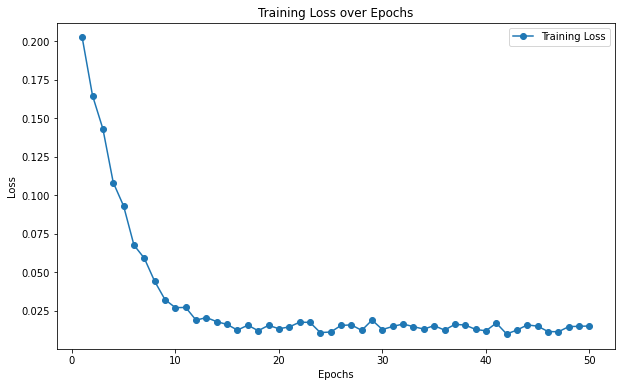

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

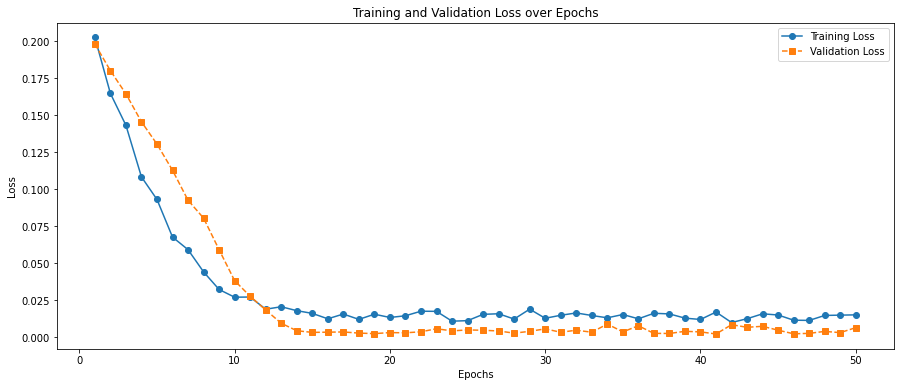

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Indian_model_LT8/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 209us/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.05931243688667342
MAE : 0.04938490577806727


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,1.440687e+06,1128752.378
1,2.580917e+05,522831.371
2,1.065606e+05,346601.304
3,1.734761e+05,444914.605
4,5.250587e+05,827036.916
5,1.059286e+06,1142021.216
6,1.709773e+06,1885693.654
7,2.471367e+06,2542569.663
8,2.995516e+06,3107373.845
9,3.401467e+06,3488175.444


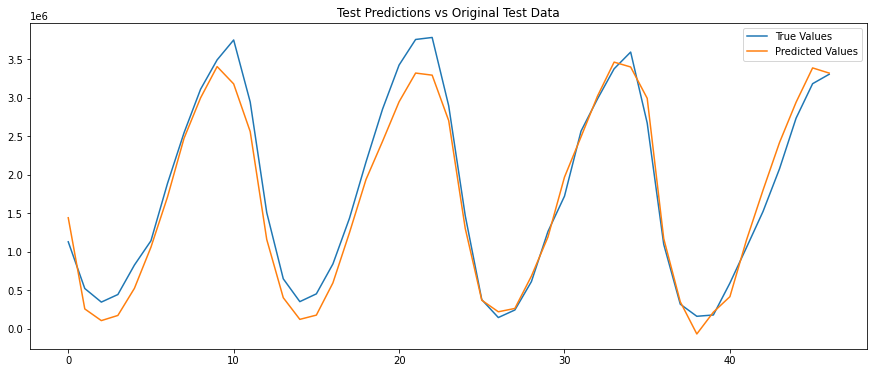

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 4ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

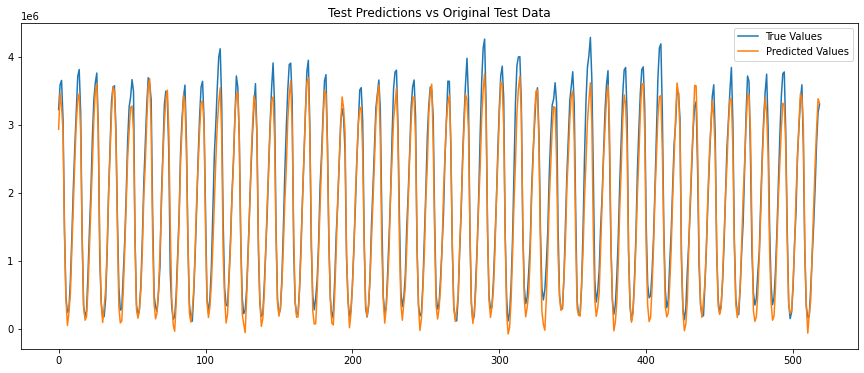

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()